<a href="https://colab.research.google.com/github/shengjiyang/DS-Unit-1-Sprint-2-Statistics/blob/master/DS-Unit-1-Sprint-2-Statistics/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np

column_headers = ['party', 'handicapped-infants',
                  'water-project-cost-sharing',
                  'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                  'el-salvador-aid', 'religious-groups-in-schools',
                  'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                  'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                  'education-spending', 'superfund-right-to-sue', 'crime',
                  'duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                          names = column_headers)

print(df.shape)
df.head()

(435, 17)


party  ... export-administration-act-south-africa
0  republican  ...                                      y
1  republican  ...                                      ?
2    democrat  ...                                      n
3    democrat  ...                                      y
4    democrat  ...                                      y

[5 rows x 17 columns]

In [0]:
df = df.replace('y', 1).replace('n', 0)
df.head()

party  ... export-administration-act-south-africa
0  republican  ...                                      1
1  republican  ...                                      ?
2    democrat  ...                                      0
3    democrat  ...                                      1
4    democrat  ...                                      1

[5 rows x 17 columns]

In [0]:
# Original Confidence Interval Function

from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
# Building a Confidence Interval for Republican for and against the
# "Handicapped Infants" resolution.

# dfObj.drop( dfObj[ dfObj['Age'] == 30 ].index , inplace=True)

rep['handicapped-infants'].drop(rep['handicapped-infants'][rep['handicapped-infants'] == '?'].index, inplace = True)

rep['handicapped-infants'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3917: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


0    134
1     31
Name: handicapped-infants, dtype: int64

In [0]:
mean, lower, upper = confidence_interval(rep['handicapped-infants'])

print(mean)
print(lower)
upper

0.18787878787878787
0.12765166444807918


0.24810591130949655

In [0]:
error_margin = upper - mean
error_margin

0.060058463048146105

### Confidence Interval (95%):
#### Republican Votes on the Handicapped Infants Resolution

$[0.1879, 0.2481]$

#### Translation:
We are confident that in 95% of cases, Between 18.79% and 24.81% of Republican congresspersons in Washington DC would vote in support of the resolution.

In [0]:
# Now for Democrats on the same issue:

dem['handicapped-infants'].drop(dem['handicapped-infants'][dem['handicapped-infants'] == '?'].index, inplace = True)
dem['handicapped-infants'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3917: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


1    156
0    102
Name: handicapped-infants, dtype: int64

In [0]:
mean, lower, upper = confidence_interval(dem['handicapped-infants'])

print(mean)
print(lower)
upper

0.6046511627906976
0.5445926997425515


0.6647096258388437

In [0]:
0.6647096258388437 - 0.5445926997425515

0.12011692609629221

### Confidence Interval (95%):
#### Democratic Votes on the Handicapped Infants Resolution

$[0.5446, 0.6647]$

#### Translation:
We are confident that in 95% of cases, Between 54.46% and 66.47% of Democratic congresspersons in Washington DC would vote in support of the resolution.

In [0]:
# Visualization of Confidence Intervals

rep_yays = rep['handicapped-infants'][rep['handicapped-infants'] == 1]
rep_yays.value_counts()

1    31
Name: handicapped-infants, dtype: int64

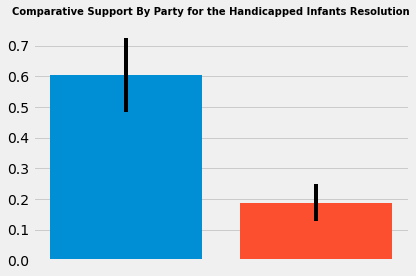

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

ax, fig = plt.subplots()
ax = plt.axes()

ax.text(s = "Comparative Support By Party for the Handicapped Infants Resolution",
        x = -0.6, y = 0.8, fontsize = 10, fontweight = 'bold')

ax.get_xaxis().set_visible(False)

plt.bar(0, 0.6046511627906976, yerr = 0.12011692609629221)
plt.bar(1, 0.18787878787878787, yerr = 0.060058463048146105);

#### From this we can see that even though the majority of Democrats supported the resolution, there was roughly twice the variability in Democratic votes as opposed to Republican votes.

This could potentially be due to the greater number of (fiscally) conservative democrats in the South during the period in question.

### Chi Squared

In [2]:
from google.colab import files
files.upload()

Saving toy_dataset.csv to toy_dataset.csv


{'toy_dataset.csv': b'Number,City,Gender,Age,Income,Illness\n1,Dallas,Male,41,40367.0,No\n2,Dallas,Male,54,45084.0,No\n3,Dallas,Male,42,52483.0,No\n4,Dallas,Male,40,40941.0,No\n5,Dallas,Male,46,50289.0,No\n6,Dallas,Female,36,50786.0,No\n7,Dallas,Female,32,33155.0,No\n8,Dallas,Male,39,30914.0,No\n9,Dallas,Male,51,68667.0,No\n10,Dallas,Female,30,50082.0,No\n11,Dallas,Female,48,41524.0,Yes\n12,Dallas,Male,47,54777.0,No\n13,Dallas,Male,46,62749.0,No\n14,Dallas,Female,42,50894.0,No\n15,Dallas,Female,61,38429.0,No\n16,Dallas,Male,43,34074.0,No\n17,Dallas,Male,27,50398.0,No\n18,Dallas,Male,38,46373.0,Yes\n19,Dallas,Male,47,51137.0,No\n20,Dallas,Female,35,23688.0,No\n21,Dallas,Male,57,17378.0,No\n22,Dallas,Male,33,45919.0,No\n23,Dallas,Female,33,23001.0,No\n24,Dallas,Female,27,34292.0,Yes\n25,Dallas,Male,58,55190.0,No\n26,Dallas,Male,64,26169.0,No\n27,Dallas,Male,58,57322.0,No\n28,Dallas,Male,44,61704.0,No\n29,Dallas,Male,34,53619.0,No\n30,Dallas,Male,45,47421.0,Yes\n31,Dallas,Female,44,40353.

In [5]:
import pandas as pd

toy = pd.read_csv('toy_dataset.csv')

toy = toy.drop('Number', axis = 1)

print(toy.shape)
toy.head()

(150000, 5)


City Gender  Age   Income Illness
0  Dallas   Male   41  40367.0      No
1  Dallas   Male   54  45084.0      No
2  Dallas   Male   42  52483.0      No
3  Dallas   Male   40  40941.0      No
4  Dallas   Male   46  50289.0      No

In [6]:
# First by Hand

print(toy.City.value_counts())
print(toy.Illness.value_counts())

New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: City, dtype: int64
No     137861
Yes     12139
Name: Illness, dtype: int64


In [8]:
# Are people from New York City or Boston more likley to be ill

print(toy.loc[toy.City.isin(['New York City', 'Boston'])])

# I was going to call this subset toy_City but decided to honor
# Eminem by calling it Toy Soldiers.
toy_Soldiers = toy.loc[toy.City.isin(['New York City', 'Boston'])]

                 City  Gender  Age    Income Illness
19707   New York City    Male   49  112226.0      No
19708   New York City    Male   42  110534.0      No
19709   New York City  Female   61  100665.0      No
19710   New York City  Female   58   98147.0     Yes
19711   New York City  Female   43   93100.0      No
...               ...     ...  ...       ...     ...
124702         Boston  Female   64   82286.0      No
124703         Boston    Male   57  103286.0      No
124704         Boston    Male   55   93937.0      No
124705         Boston    Male   37   95113.0      No
124706         Boston    Male   57   92042.0     Yes

[58608 rows x 5 columns]


In [13]:
subset = pd.crosstab(toy_Soldiers.City, toy_Soldiers.Illness, margins = True)

print(subset.shape)
subset

(3, 3)


Illness           No   Yes    All
City                             
Boston          7615   686   8301
New York City  46286  4021  50307
All            53901  4707  58608

In [12]:
contingency = pd.crosstab(toy_Soldiers.City, toy_Soldiers.Illness,
                          margins = False)

print(contingency.shape)
contingency

(2, 2)


Illness           No   Yes
City                      
Boston          7615   686
New York City  46286  4021

In [45]:
row_totals = subset.iloc[0:2, 2:].values
print(row_totals.shape)
row_totals = row_totals.T[0]
row_totals

(2, 1)


array([ 8301, 50307])

In [46]:
column_totals = subset.iloc[2:, 0:2].values
print(column_totals.shape)
column_totals = column_totals[0].T
column_totals

(1, 2)


array([53901,  4707])

In [42]:
size = toy_Soldiers.shape[0]
size

58608

In [47]:
import numpy as np

expected = []
for i in range(len(row_totals)):
  expected_row = []
  for columns in column_totals:
    expected_val = columns * row_totals[i] / size
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
expected

(2, 2)


array([[ 7634.31956388,   666.68043612],
       [46266.68043612,  4040.31956388]])

In [53]:
chi_sqr = ((contingency.values - expected) ** 2 / expected).sum()
chi_sqr

0.709194708849235

In [52]:
# Now to Make SciPy Do It:)

# Not certain why chi_sqr != chi2.
# Regardless, both are near zero, indicating that there is not a substantial
# difference between the ratio of imaginary New Yorkers who are Ill compared
# to the ratio of imaginary Bostonians who are ill.

from scipy.stats import chi2_contingency
chi2, pvalue, df, expected_value = chi2_contingency(contingency)

print(chi2)
print(pvalue)
print(df)
expected_value

0.672961098411823
0.41202113440242505
1
[[ 7634.31956388   666.68043612]
 [46266.68043612  4040.31956388]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)